In [6]:
import json
import calendar
import random
from datetime import date, timedelta

import faker
import numpy as np
from pandas import DataFrame
from delorean import parse
import pandas as pd

# make the graphs nicer
#pd.set_option('display.mpl_style', 'default')

In [12]:
fake = faker.Faker()

In [11]:
usernames = set()
usernames_no = 1000
# populate the set with 1000 unique usernames
while len(usernames) < usernames_no:
    usernames.add(fake.user_name())

In [24]:
def get_random_name_and_gender():
    skew = .6 # 60% of users will be female
    male = random.random() > skew
    if male:
        return fake.name_male(), 'M'
    else:
        return fake.name_female(), 'F'

def get_users(usernames):
    users = []
    for username in usernames:
        name, gender = get_random_name_and_gender()
        user = {
            'username': username,
            'name': name,
            'gender': gender,
            'email': fake.email(),
            'age': fake.random_int(min=18, max=90),
            'address': fake.address(),
        }
        users.append(json.dumps(user))
    return users

users = get_users(usernames)
users[:3]

['{"username": "solisantonio", "name": "Ashlee Torres", "gender": "F", "email": "michaelodonnell@hotmail.com", "age": 62, "address": "4794 Roger Cliff\\nNorth Shawn, HI 57185"}',
 '{"username": "ogilmore", "name": "Edward Ware", "gender": "M", "email": "anthonypearson@wong-howell.biz", "age": 49, "address": "4903 Ashley Spring Apt. 007\\nAlexandertown, PA 81310"}',
 '{"username": "leachjennifer", "name": "Tiffany Collins", "gender": "F", "email": "josephwhite@alvarado.com", "age": 60, "address": "55704 Houston Lock\\nBrittanyhaven, IL 13088"}']

In [31]:
# campaign name format:
# InternalType_StartDate_EndDate_TargetAge_TargetGender_Currency
def get_type():
    # just some gibberish internal codes
    types = ['AKX', 'BYU', 'GRZ', 'KTR']
    return random.choice(types)

def get_start_end_dates():
    duration = random.randint(1, 2 * 365)
    offset = random.randint(-365, 365)
    start = date.today() - timedelta(days=offset)
    end = start + timedelta(days=duration)
    
    def _format_date(date_):
        return date_.strftime("%Y%m%d")
    
    return _format_date(start), _format_date(end)

def get_age():
    age = random.randint(20, 45)
    age -= age % 5
    diff = random.randint(5, 25)
    diff -= diff % 5
    return '{}-{}'.format(age, age + diff)

def get_gender():
    return random.choice(('M', 'F', 'B'))

def get_currency():
    return random.choice(('GBP', 'EUR', 'USD'))

def get_campaign_name():
    separator = '_'
    type_ = get_type()
    start_end = separator.join(get_start_end_dates())
    age = get_age()
    gender = get_gender()
    currency = get_currency()
    return separator.join((type_, start_end, age, gender, currency))

In [34]:
def get_campaign_data():
    name = get_campaign_name()
    budget = random.randint(10**3, 10**6)
    spent = random.randint(10**2, budget)
    clicks = int(random.triangular(10**2, 10**5, 0.2 * 10**5))
    impressions = int(random.gauss(0.5 * 10**6, 2))
    
    return {
        'cmp_name': name,
        'cmp_bgt': budget,
        'cmp_spent': spent,
        'cmp_clicks': clicks,
        'cmp_impr': impressions
    }

In [36]:
def get_data(users):
    data = []
    for user in users:
        campaigns = [get_campaign_data() for _ in range(random.randint(2, 8))]
        data.append({'user': user, 'campaigns': campaigns})
    return data



In [37]:
rough_data = get_data(users)
rough_data[:2]

[{'user': '{"username": "solisantonio", "name": "Ashlee Torres", "gender": "F", "email": "michaelodonnell@hotmail.com", "age": 62, "address": "4794 Roger Cliff\\nNorth Shawn, HI 57185"}',
  'campaigns': [{'cmp_name': 'GRZ_20190508_20191007_45-70_F_USD',
    'cmp_bgt': 222548,
    'cmp_spent': 103455,
    'cmp_clicks': 25933,
    'cmp_impr': 500000},
   {'cmp_name': 'GRZ_20190624_20201009_25-30_B_USD',
    'cmp_bgt': 781645,
    'cmp_spent': 475007,
    'cmp_clicks': 45559,
    'cmp_impr': 500000},
   {'cmp_name': 'AKX_20181226_20190816_30-40_F_EUR',
    'cmp_bgt': 20378,
    'cmp_spent': 14297,
    'cmp_clicks': 30505,
    'cmp_impr': 500001},
   {'cmp_name': 'KTR_20180418_20190607_35-55_M_GBP',
    'cmp_bgt': 258477,
    'cmp_spent': 118361,
    'cmp_clicks': 13989,
    'cmp_impr': 500002},
   {'cmp_name': 'BYU_20190112_20190613_20-35_B_USD',
    'cmp_bgt': 388288,
    'cmp_spent': 148840,
    'cmp_clicks': 8682,
    'cmp_impr': 500002},
   {'cmp_name': 'BYU_20181024_20200828_35-55_F_

In [38]:
data = []
for datum in rough_data:
    for campaign in datum['campaigns']:
        campaign.update({'user': datum['user']})
        data.append(campaign)
data[:2]

[{'cmp_name': 'GRZ_20190508_20191007_45-70_F_USD',
  'cmp_bgt': 222548,
  'cmp_spent': 103455,
  'cmp_clicks': 25933,
  'cmp_impr': 500000,
  'user': '{"username": "solisantonio", "name": "Ashlee Torres", "gender": "F", "email": "michaelodonnell@hotmail.com", "age": 62, "address": "4794 Roger Cliff\\nNorth Shawn, HI 57185"}'},
 {'cmp_name': 'GRZ_20190624_20201009_25-30_B_USD',
  'cmp_bgt': 781645,
  'cmp_spent': 475007,
  'cmp_clicks': 45559,
  'cmp_impr': 500000,
  'user': '{"username": "solisantonio", "name": "Ashlee Torres", "gender": "F", "email": "michaelodonnell@hotmail.com", "age": 62, "address": "4794 Roger Cliff\\nNorth Shawn, HI 57185"}'}]

In [41]:
df = DataFrame(data)
df.head()

,cmp_bgt,cmp_clicks,cmp_impr,cmp_name,cmp_spent,user
0,222548,25933,500000,GRZ_20190508_20191007_45-70_F_USD,103455,"{""username"": ""solisantonio"", ""name"": ""Ashlee T..."
1,781645,45559,500000,GRZ_20190624_20201009_25-30_B_USD,475007,"{""username"": ""solisantonio"", ""name"": ""Ashlee T..."
2,20378,30505,500001,AKX_20181226_20190816_30-40_F_EUR,14297,"{""username"": ""solisantonio"", ""name"": ""Ashlee T..."
3,258477,13989,500002,KTR_20180418_20190607_35-55_M_GBP,118361,"{""username"": ""solisantonio"", ""name"": ""Ashlee T..."
4,388288,8682,500002,BYU_20190112_20190613_20-35_B_USD,148840,"{""username"": ""solisantonio"", ""name"": ""Ashlee T..."


In [42]:
df.count()

cmp_bgt       5045
cmp_clicks    5045
cmp_impr      5045
cmp_name      5045
cmp_spent     5045
user          5045
dtype: int64

In [43]:
df.describe()

,cmp_bgt,cmp_clicks,cmp_impr,cmp_spent
count,5045.000000,5045.000000,5045.000000,5045.000000
mean,496980.193657,39523.491774,499999.441427,249901.595045
std,289746.085569,21455.525229,2.024627,221911.886425
min,1245.000000,570.000000,499992.000000,119.000000
25%,250257.000000,22210.000000,499998.000000,63124.000000
50%,487646.000000,36132.000000,499999.000000,185330.000000
75%,750423.000000,54403.000000,500001.000000,380663.000000
max,999953.000000,97955.000000,500007.000000,977423.000000


In [45]:
df.sort_values(by=['cmp_bgt'], ascending=False).head(3)

,cmp_bgt,cmp_clicks,cmp_impr,cmp_name,cmp_spent,user
4775,999953,58578,500000,AKX_20180605_20180615_30-45_F_GBP,771904,"{""username"": ""bowerssusan"", ""name"": ""Jacob Bar..."
1880,999706,38675,500000,AKX_20190313_20191015_20-25_M_EUR,662424,"{""username"": ""whitemichael"", ""name"": ""Linda Jo..."
2209,999126,24699,499999,GRZ_20190324_20190524_35-45_M_USD,714536,"{""username"": ""margaret38"", ""name"": ""Casey Diaz..."


In [46]:
df.sort_values(by=['cmp_bgt'], ascending=False).tail(3)

,cmp_bgt,cmp_clicks,cmp_impr,cmp_name,cmp_spent,user
2790,1418,67197,499995,BYU_20180811_20191212_30-55_B_USD,902,"{""username"": ""fisherhelen"", ""name"": ""Andrea Ro..."
3907,1321,19194,499998,GRZ_20190217_20201212_30-40_M_GBP,148,"{""username"": ""zhowe"", ""name"": ""Diane Dalton"", ..."
1785,1245,26657,499998,KTR_20190613_20190918_30-50_M_USD,433,"{""username"": ""ffoley"", ""name"": ""Wendy Thompson..."


In [47]:
def unpack_campaign_name(name):
    type_, start, end, age, gender, currency = name.split('_')
    start = parse(start).date
    end = parse(end).date
    return type_, start, end, age, gender, currency

campaign_data = df['cmp_name'].apply(unpack_campaign_name)
campaign_cols = ['Type', 'Start', 'End', 'Age', 'Gender', 'Currency']
campaign_df = DataFrame(campaign_data.tolist(), columns=campaign_cols, index=df.index)
campaign_df.head(3)

,Type,Start,End,Age,Gender,Currency
0,GRZ,2019-08-05,2019-07-10,45-70,F,USD
1,GRZ,2019-06-24,2020-09-10,25-30,B,USD
2,AKX,2018-12-26,2019-08-16,30-40,F,EUR


In [49]:
df = df.join(campaign_df)

In [50]:
df[['cmp_name'] + campaign_cols].head(3)

,cmp_name,Type,Start,End,Age,Gender,Currency
0,GRZ_20190508_20191007_45-70_F_USD,GRZ,2019-08-05,2019-07-10,45-70,F,USD
1,GRZ_20190624_20201009_25-30_B_USD,GRZ,2019-06-24,2020-09-10,25-30,B,USD
2,AKX_20181226_20190816_30-40_F_EUR,AKX,2018-12-26,2019-08-16,30-40,F,EUR


In [63]:
def unpack_user_json(user):
    user = json.loads(user.strip())
    return [
        user['username'],
        user['email'],
        user['name'],
        user['gender'],
        user['age'],
        user['address'],
    ]

user_data = df['user'].apply(unpack_user_json)
user_cols = ['username', 'email', 'name', 'gender', 'age', 'address']
user_df = DataFrame(user_data.tolist(), columns=user_cols, index=df.index)

,user,username,email,name,gender,age,address
0,"{""username"": ""solisantonio"", ""name"": ""Ashlee T...",solisantonio,michaelodonnell@hotmail.com,Ashlee Torres,F,62,"4794 Roger Cliff\nNorth Shawn, HI 57185"
1,"{""username"": ""solisantonio"", ""name"": ""Ashlee T...",solisantonio,michaelodonnell@hotmail.com,Ashlee Torres,F,62,"4794 Roger Cliff\nNorth Shawn, HI 57185"
2,"{""username"": ""solisantonio"", ""name"": ""Ashlee T...",solisantonio,michaelodonnell@hotmail.com,Ashlee Torres,F,62,"4794 Roger Cliff\nNorth Shawn, HI 57185"


In [64]:
df = df.join(user_df)

In [65]:
df[['user'] + user_cols].head(3)

,user,username,email,name,gender,age,address
0,"{""username"": ""solisantonio"", ""name"": ""Ashlee T...",solisantonio,michaelodonnell@hotmail.com,Ashlee Torres,F,62,"4794 Roger Cliff\nNorth Shawn, HI 57185"
1,"{""username"": ""solisantonio"", ""name"": ""Ashlee T...",solisantonio,michaelodonnell@hotmail.com,Ashlee Torres,F,62,"4794 Roger Cliff\nNorth Shawn, HI 57185"
2,"{""username"": ""solisantonio"", ""name"": ""Ashlee T...",solisantonio,michaelodonnell@hotmail.com,Ashlee Torres,F,62,"4794 Roger Cliff\nNorth Shawn, HI 57185"


In [69]:
better_columns = [
    'Budget', 'Clicks', 'Impressions',
    'cmp_name', 'Spent', 'user',
    'Type', 'Start', 'End',
    'Target Age', 'Target Gender', 'Currency',
    'Username', 'Email', 'Name',
    'Gender', 'Age', 'Address',
]
df.columns = better_columns

In [70]:
def calculate_extra_columns(df):
    # Click Through Rate
    df['CTR'] = df['Clicks'] / df['Impressions']
    
    #Cost Per Click
    df['CPC'] = df['Spent'] / df['Clicks']
    
    #Cost Per Impression
    df['CPI'] = df['Spent'] / df['Impressions']

calculate_extra_columns(df)

In [71]:
df[['Spent', 'Clicks', 'Impressions', 'CTR', 'CPC', 'CPI']].head(3)

,Spent,Clicks,Impressions,CTR,CPC,CPI
0,103455,25933,500000,0.051866,3.989319,0.206910
1,475007,45559,500000,0.091118,10.426195,0.950014
2,14297,30505,500001,0.061010,0.468677,0.028594


In [72]:
clicks = df['Clicks'][0]
impressions = df['Impressions'][0]
spent = df['Spent'][0]
CTR = df['CTR'][0]
CPC = df['CPC'][0]
CPI = df['CPI'][0]
print('CTR:', CTR, clicks / impressions)
print('CPC:', CPC, spent / clicks)
print('CPI:', CPI, spent / impressions)

CTR: 0.051866 0.051866
CPC: 3.9893186287741487 3.9893186287741487
CPI: 0.20691 0.20691


In [74]:
def get_day_of_the_week(day):
    number_to_day = dict(enumerate(calendar.day_name, 1))
    return number_to_day[day.isoweekday()]

def get_duration(row):
    return (row['End'] - row['Start']).days

df['Day of Week'] = df['Start'].apply(get_day_of_the_week)
df['Duration'] = df.apply(get_duration, axis=1)

In [75]:
df[['Start', 'End', 'Duration', 'Day of Week']].head(3)

,Start,End,Duration,Day of Week
0,2019-08-05,2019-07-10,-26,Monday
1,2019-06-24,2020-09-10,444,Monday
2,2018-12-26,2019-08-16,233,Wednesday


In [76]:
final_columns = [
'Type', 'Start', 'End', 'Duration', 'Day of Week', 'Budget',
'Currency', 'Clicks', 'Impressions', 'Spent', 'CTR', 'CPC',
'CPI', 'Target Age', 'Target Gender', 'Username', 'Email',
'Name', 'Gender', 'Age'
]
df = df[final_columns]

In [77]:
df.head(3)

,Type,Start,End,Duration,Day of Week,Budget,Currency,Clicks,Impressions,Spent,CTR,CPC,CPI,Target Age,Target Gender,Username,Email,Name,Gender,Age
0,GRZ,2019-08-05,2019-07-10,-26,Monday,222548,USD,25933,500000,103455,0.051866,3.989319,0.206910,45-70,F,solisantonio,michaelodonnell@hotmail.com,Ashlee Torres,F,62
1,GRZ,2019-06-24,2020-09-10,444,Monday,781645,USD,45559,500000,475007,0.091118,10.426195,0.950014,25-30,B,solisantonio,michaelodonnell@hotmail.com,Ashlee Torres,F,62
2,AKX,2018-12-26,2019-08-16,233,Wednesday,20378,EUR,30505,500001,14297,0.061010,0.468677,0.028594,30-40,F,solisantonio,michaelodonnell@hotmail.com,Ashlee Torres,F,62


In [78]:
df.to_csv('df.csv')

In [79]:
df.to_json('df.json')

In [80]:
df.to_excel('df.xls')

In [82]:
df.to_html('df.html')

In [83]:
%matplotlib inline

In [ ]:
import pylab
pylab.rcParams.update({'font.family'> 'serif'})

In [84]:
df.describe()

,Duration,Budget,Clicks,Impressions,Spent,CTR,CPC,CPI,Age
count,5045.000000,5045.000000,5045.000000,5045.000000,5045.000000,5045.000000,5045.000000,5045.000000,5045.000000
mean,362.958375,496980.193657,39523.491774,499999.441427,249901.595045,0.079047,9.944103,0.499804,55.600595
std,248.050279,289746.085569,21455.525229,2.024627,221911.886425,0.042911,16.495164,0.443824,20.621029
min,-330.000000,1245.000000,570.000000,499992.000000,119.000000,0.001140,0.001843,0.000238,18.000000
25%,173.000000,250257.000000,22210.000000,499998.000000,63124.000000,0.044420,1.742804,0.126248,38.000000
50%,367.000000,487646.000000,36132.000000,499999.000000,185330.000000,0.072264,5.268883,0.370659,57.000000
75%,551.000000,750423.000000,54403.000000,500001.000000,380663.000000,0.108806,11.934863,0.761329,74.000000
max,1064.000000,999953.000000,97955.000000,500007.000000,977423.000000,0.195910,316.015770,1.954854,90.000000


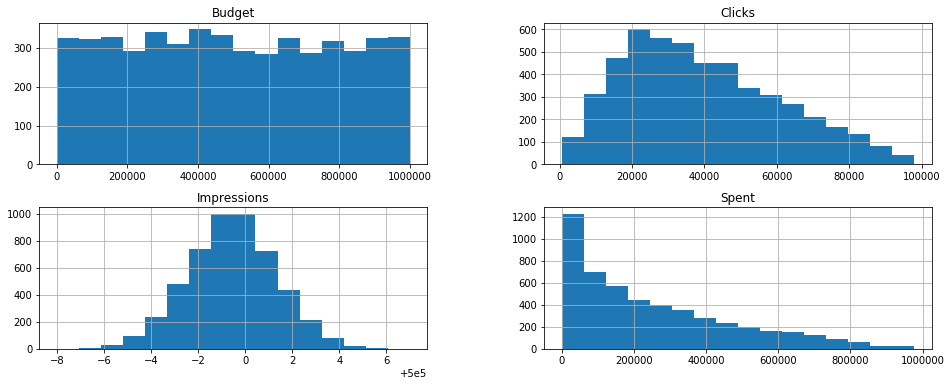

In [86]:
df[['Budget', 'Spent', 'Clicks', 'Impressions']].hist(bins=16, figsize=(16,6));

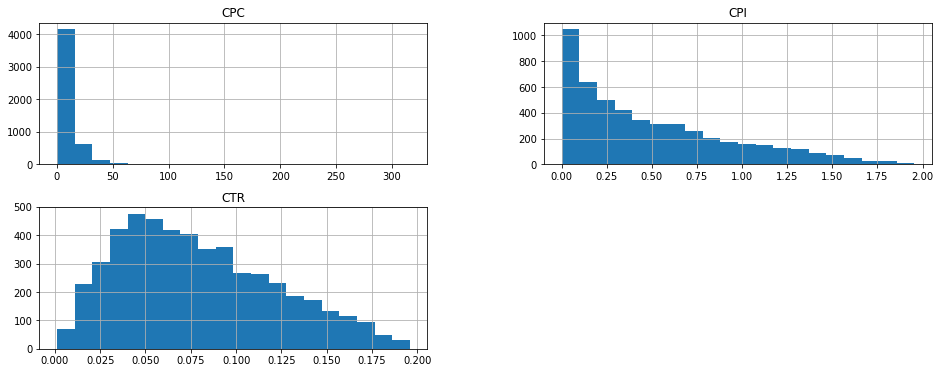

In [87]:
df[['CTR', 'CPC', 'CPI']].hist(bins=20, figsize=(16,6));

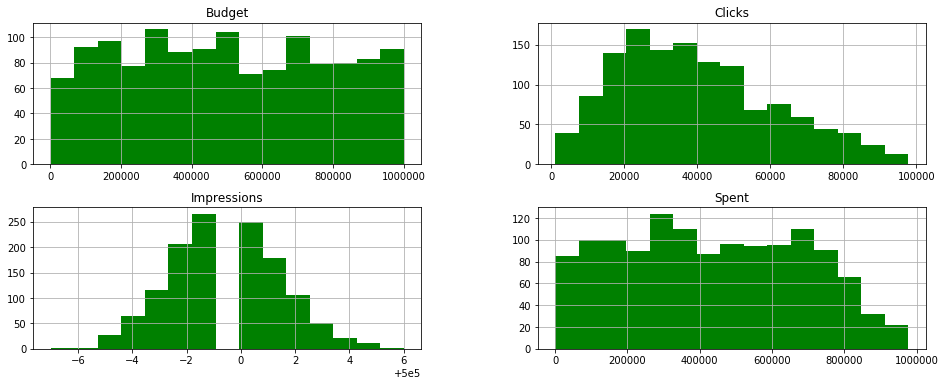

In [90]:
mask = (df.Spent > 0.75 * df.Budget)
df[mask][['Budget', 'Spent', 'Clicks', 'Impressions']].hist(bins=15, figsize=(16, 6), color='g');

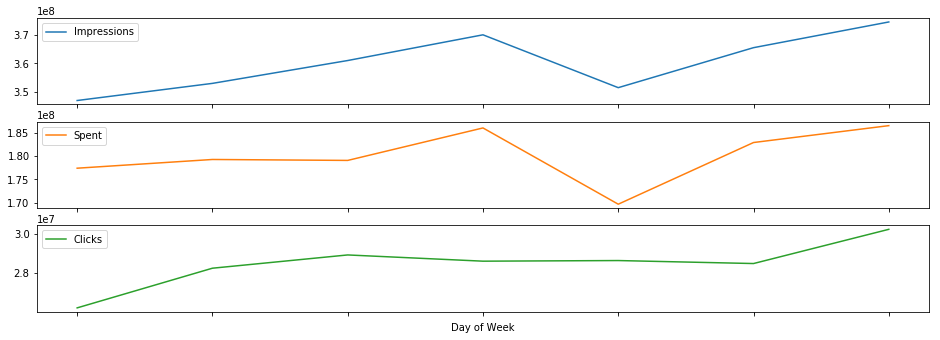

In [93]:
df_weekday = df.groupby(['Day of Week']).sum()
df_weekday[['Impressions', 'Spent', 'Clicks']].plot(figsize=(16, 6), subplots=True);

In [94]:
agg_config = {
        'Impressions': {
        'Mean Impr': 'mean',
        'Std Impr': 'std',
    },
    'Spent': ['mean', 'std'],
    }
df.groupby(['Target Gender', 'Target Age']).agg(agg_config)

/home/fernando/.local/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Impressions                    Spent  \
                              Mean Impr  Std Impr           mean   
Target Gender Target Age                                           
B             20-25       499999.726027  1.865329  262429.575342   
              20-30       499999.726316  2.095802  224623.063158   
              20-35       499999.589744  2.326783  268666.705128   
              20-40       499999.566667  2.235057  241030.516667   
              20-45       499999.300000  2.406011  238249.100000   
              25-30       499999.431818  2.153828  284859.863636   
              25-35       499999.219512  2.102464  232878.926829   
              25-40       499999.169014  2.342074  272685.816901   
              25-45       499999.597826  1.967091  207285.065217   
              25-50       499999.666667  1.414214  188523.000000   
              30-35       499999.142857  1.713423  246782.628571   
              30-40       499999.465116  1.799985  239763.232558   
              30-45       499999.592593  1.869343  231642.851852   
              30-50       499999.373494  1.812631  279370.506024   
              30-55       499999.300000  2.473012  299526.550000   
              35-40       499999.354430  2.032038  240329.569620   
              35-45       499999.500000  2.149353  246720.916667   
              35-50       499999.493506  2.297730  254525.610390   
              35-55       499999.435484  2.053553  218646.564516   
              35-60       499999.500000  1.786703  282934.428571   
              40-45       499999.358974  2.088772  224398.320513   
              40-50       499999.492754  1.975014  288542.594203   
              40-55       499999.726190  1.971796  240787.690476   
              40-60       499999.344828  1.764163  252731.793103   
              40-65       500000.210526  1.750522  244842.947368   
              45-50       500000.166667  2.316607  312431.500000   
              45-55       499999.437500  2.365551  255607.875000   
              45-60       499999.384615  2.599310  201098.230769   
              45-65       500000.000000  1.354006  271270.000000   
              45-70       500000.000000  3.000000  333491.000000   
...                                 ...       ...            ...   
M             20-25       499998.871429  2.139494  255113.428571   
              20-30       499999.231884  1.610124  234382.666667   
              20-35       499999.191011  2.060871  267715.258427   
              20-40       499999.397059  1.877913  244769.500000   
              20-45       499999.545455  2.067058  246438.363636   
              25-30       499999.875000  2.109252  282691.722222   
              25-35       499999.098901  1.949672  244537.439560   
              25-40       499999.586207  2.003205  229522.448276   
              25-45       499999.505747  1.903935  258799.597701   
              25-50       499999.800000  2.802255  304364.350000   
              30-35       499999.211268  1.977845  225222.957746   
              30-40       499999.369048  1.740930  258718.273810   
              30-45       499999.661017  2.097701  244897.559322   
              30-50       499999.473684  2.253730  226256.368421   
              30-55       500000.583333  1.729862  240158.416667   
              35-40       499999.101266  1.736449  246147.721519   
              35-45       499999.736111  2.041768  254130.652778   
              35-50       499999.320988  2.137915  244214.000000   
              35-55       499999.013889  2.132862  201526.208333   
              35-60       499999.375000  1.500000  194222.437500   
              40-45       499999.602564  1.949624  244937.051282   
              40-50       499999.537313  2.363410  290423.701493   
              40-55       499999.626866  1.889651  266085.238806   
              40-60       499999.366197  2.001710  290211.197183   
              40-65       499999.166667  1.757338  272970.722222   
              45

In [96]:
pivot = df.pivot_table(
    values=['Impressions', 'Clicks', 'Spent'],
    index=['Target Age'],
    columns=['Target Gender'],
    aggfunc=np.sum
)
pivot

Clicks                   Impressions                      \
Target Gender        B        F        M           B         F         M   
Target Age                                                                 
20-25          2820979  3143866  2515864    36499980  38999936  34999921   
20-30          3755752  3176726  2509720    47499974  40500017  34499947   
20-35          2789607  2835666  3495751    38999968  37499962  44499928   
20-40          2506532  3350509  2414526    29999974  38499956  33999959   
20-45           381162   728349   604775     4999993   9499975   5499995   
25-30          3380396  2878676  2891466    43999950  33499972  35999991   
25-35          3500660  2691573  3658766    40999936  33499976  45499918   
25-40          2925181  2710068  3302021    35499941  35999957  43499964   
25-45          3712332  3363710  3292693    45999963  39999943  43499957   
25-50           308282   655572   731991     4499997   9999970   9999996   
30-35          2941173  2688650  2654672    34999940  33999972  35499944   
30-40          3285513  3294274  3308339    42999954  41500029  41999947   
30-45          3183502  3073836  2571105    40499967  38499943  29499980   
30-50          3432393  3735357  3150265    41499948  46999945  37999960   
30-55           709797   380437   506914     9999986   5000001   6000007   
35-40          2987942  3546374  2997171    39499949  41999934  39499929   
35-45          2773454  3422417  2798402    35999964  44499956  35999981   
35-50          3273633  3108647  3443795    38499961  34499960  40499945   
35-55          2203929  3687866  2959814    30999965  42499969  35999929   
35-60           639165   629888   551875     6999993   7499982   7999990   
40-45          3115844  2369674  3227785    38999950  33499969  38999969   
40-50          2541388  2919529  2525283    34499965  38499927  33499969   
40-55          3257102  3222777  2607118    41999977  41499920  33499975   
40-60          3586674  2696542  2741540    43499943  37999935  35499955   
40-65           655725   596193   753280     9500004   6499996   8999985   
45-50           206345   561063   608917     3000001   5999989   9499985   
45-55           614821   724971   713163     7999991   9999977   7499994   
45-60           526732   749933   537354     6499992  10000001   7499989   
45-65           550919   671115   627024     6500000   7999995   7999988   
45-70           180497   262435    70503     1500000   2999997   1499998   

                  Spent                      
Target Gender         B         F         M  
Target Age                                   
20-25          19157359  17773427  17857940  
20-30          21339191  22891571  16172404  
20-35          20956003  19703526  23826658  
20-40          14461831  23764954  16644326  
20-45           2382491   3432232   2710822  
25-30          25067668  15109879  20353804  
25-35          19096072  18961158  22252907  
25-40          19360693  20453697  19968453  
25-45          19070226  18216361  22515565  
25-50           1696707   4484995   6087287  
30-35          17274784  15727831  15990830  
30-40          20619638  23111485  21732335  
30-45          18763071  19839897  14448956  
30-50          23187752  21431575  17195484  
30-55           5990531   2890529   2881901  
35-40          18986036  20552848  19445670  
35-45          17763906  18694697  18297407  
35-50          19598472  18114952  19781334  
35-55          13556087  22643363  14509887  
35-60           3961082   3555080   3107559  
40-45          17503069  16663692  19105090  
40-50          19909439  18922020  19458388  
40-55          20226166  16321417  17827711  
40-60          21987666  24595012  20604995  
40-65           4652016   3381206   4913473  
45-50           1874589   3211367   4162225  
45-55           4089726   4824430   4094785  
45-60           2614277   5286217   2408037  
45-65           3526510   3355881   2414193  
45-70           1000473   1926254  